Imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import nsolve
from sympy import Symbol
from sympy import cos,sin,tan,sqrt
import math

Utility functions and constants

In [47]:
def Kepler3(T):
    K = 4*np.pi**2/(G*M)
    a = (T**2/K)**(1/3)
    return a


def Spherical2xyz(a, e, i, raan, ma, ap):
    p = a*(1-e**2)
    ea = M2E(ma, e)
    theta = E2nu(ea, e)
    r = p/(1+e*cos(theta))*np.array([[cos(theta)], [sin(theta)], [0]])
    v = sqrt(G*M/p)*np.array([[-sin(theta)], [e+cos(theta)], [0]])
    M1 = np.matrix([[cos(ap), -sin(ap), 0],
                   [sin(ap), cos(ap), 0],
                   [0, 0, 1]])
    M2 = np.matrix([[1, 0, 0],
                   [0, cos(i), -sin(i)],
                   [0, sin(i), cos(i)]])

    M3 = np.matrix([[cos(raan), -sin(raan), 0],
                   [sin(raan), cos(raan), 0],
                   [0, 0, 1]])

    X = np.dot(M3,np.dot(M2,np.dot(M1,r)))
    V = np.dot(M3,np.dot(M2,np.dot(M1,v)))
    return X,V


def M2E(AM, e):
    x = Symbol('x')
    sol = (nsolve(x - e*sin(x)-AM, x, 0))
    return float(sol)


def E2nu(AE, e):
    # return 2*np.arctan(tan(AE/2)*sqrt((1+e)/(1-e)))
    sol =  tan(AE/2)*sqrt((1+e)/(1-e))
    return 2*math.atan(sol)


G = 6.67430e-11  # gravitational constant
M = 5.9722e24  # earth mass
R = 6400  # earth radius (km)
# LEO
aLeoMin = R + 200
aLeoMax = R + 1500
# MEO
aMeoMin = R + 2000
aMeoMax = 35700
# GEO
aGeo = 35786


Data analysis

In [65]:
sourcefile = open('cat.txt', 'r')
outputfile = open('PV.txt','w')
Lines = sourcefile.readlines()
N= len(Lines) #number of objects

A = [] #list of semi major axis
E = [] #list of eccentricity
I = [] #list of inclinations
RAAN = [] #list of raan
ArgP = [] #list of perigee arguments
MA = [] #list of mean anomalies
Time = [] #list of epoch


# we fetch the orbital parameters from TLES
for j in range(int(N/2)):
    print(2*j/N)
    line1 = Lines[2*j]
    line2 = Lines[2*j+1]
    #line = list(map(float, line))
    e = float("."+line2[26:33]) #orbit exentricity
    T = 3600*24/float(line2[52:63]) #revolution period in s
    i = float(line2[8:16])*np.pi/180
    raan = float(line2[17:25])*np.pi/180
    argP = float(line2[17:25])*np.pi/180
    ma = float(line2[43:51])*np.pi/180
    time = float(line1[18:32])
    a = Kepler3(T)
    A.append(a)
    E.append(e)
    I.append(i)
    RAAN.append(raan)
    ArgP.append(argP)
    MA.append(ma)
    Time.append(time)
    X,V = Spherical2xyz(a,e,i,raan,ma,argP)
    for x in X:
        outputfile.write(str(x[0,0])+',')
    for v in V:
        outputfile.write(str(v[0,0])+',')
    outputfile.write(str(time))
    outputfile.write('\n')

outputfile.close()


0.0
4.109983149069089e-05
8.219966298138178e-05
0.00012329949447207266
0.00016439932596276356
0.00020549915745345443
0.0002465989889441453
0.0002876988204348362
0.0003287986519255271
0.000369898483416218
0.00041099831490690886
0.0004520981463975998
0.0004931979778882906
0.0005342978093789816
0.0005753976408696724
0.0006164974723603633
0.0006575973038510542
0.000698697135341745
0.000739796966832436
0.0007808967983231269
0.0008219966298138177
0.0008630964613045086
0.0009041962927951996
0.0009452961242858905
0.0009863959557765813
0.0010274957872672722
0.0010685956187579631
0.001109695450248654
0.0011507952817393448
0.0011918951132300357
0.0012329949447207266
0.0012740947762114175
0.0013151946077021085
0.0013562944391927994
0.00139739427068349
0.001438494102174181
0.001479593933664872
0.0015206937651555629
0.0015617935966462538
0.0016028934281369447
0.0016439932596276354
0.0016850930911183263
0.0017261929226090173
0.0017672927540997082
0.0018083925855903991
0.00184949241708109
0.0018905922

## Conversion to PV coordinates

In [ ]:

X,V = Spherical2xyz(A[0],E[0],I[0],RAAN[0],MA[0],ArgP[0])


## Number of debris function of orbit

Text(0, 0.5, 'Number of > 10 cm debris')

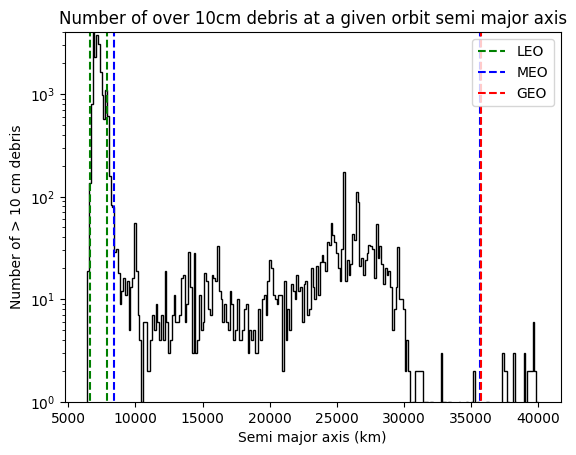

In [53]:
counts, bins = np.histogram(np.array(A)/1000,250,(R,40000))

plt.plot([aLeoMin, aLeoMin], [-1000, 10000],'g--')
plt.plot([aLeoMax, aLeoMax], [-1000, 10000],'g--',label='LEO')

plt.plot([aMeoMin, aMeoMin], [-1000, 10000],'b--')
plt.plot([aMeoMax, aMeoMax], [-1000, 10000],'b--',label='MEO')

plt.plot([aGeo, aGeo], [-1000, 10000],'r--',label='GEO')

plt.stairs(counts, bins,edgecolor='k')
plt.ylim([1,4000])
plt.yscale('log')
plt.legend(loc='upper right')
plt.title('Number of over 10cm debris at a given orbit semi major axis')
plt.xlabel('Semi major axis (km)')
plt.ylabel('Number of > 10 cm debris')